# Electronic band structure of graphene

- by Börge Göbel, modified by Larry Li
- Reference note https://courses.cit.cornell.edu/mse5470/handout8.pdf


In [1]:

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)

## 1. One-dimensional band structures

### 1.1 Free electrons: 

\\( E(k) = \frac{p^2}{2m} = \frac{\hbar^2}{2m}k^2\\) is the solution of the 

stationary Schrödinger equation without any potential \\( -\frac{\hbar^2}{2m}\phi''(x) = E\phi(x). \\)

The corresponding wave function is called a "plane wave" \\( \phi(x) \propto e^{ikx}.\\)

### 1.2 Quasi-free electrons in a periodic crystal:

Lattice periodic potential \\( V(x)=V(x+na) \\) of the periodic atomic lattice modifies the 

stationary Schrödinger equation \\( -\frac{\hbar^2}{2m}\phi''(x) = \left[E-V(x)\right]\phi(x). \\)

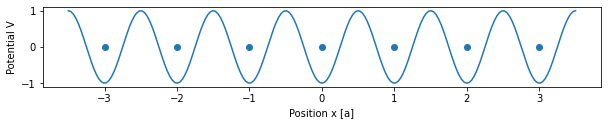

In [2]:
x_array = np.linspace(-3.5,3.5,201)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(0.5)

plt.xlabel('Position x [a]')
plt.ylabel('Potential V')

plt.plot(
    x_array, -np.cos(x_array*2*np.pi)
)

plt.scatter(
    np.linspace(-3,3,7), np.zeros(7)
)

The wave functions become periodic "Bloch functions" (in \\( x \\) and \\( k \\)) and the eigenenergies change. 

In [3]:
k_array = np.linspace(-4*np.pi,4*np.pi,101)
E_array = 1/2 * k_array**2

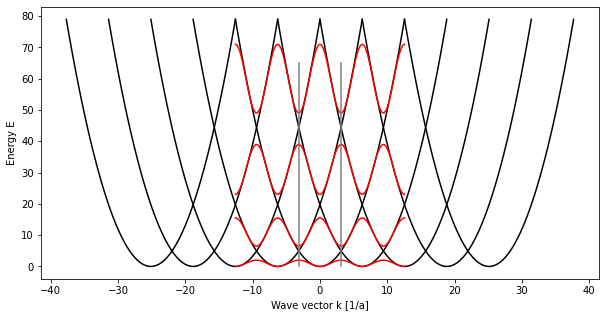

In [4]:
plt.xlabel('Wave vector k [1/a]')
plt.ylabel('Energy E')

# plt.xlim([-1.5*np.pi,1.5*np.pi])
# plt.ylim([0,65])

plt.plot(
    k_array, E_array, 'black',
    k_array+2*np.pi, E_array, 'black',
    k_array-2*np.pi, E_array, 'black',
    k_array+4*np.pi, E_array, 'black',
    k_array-4*np.pi, E_array, 'black',
    k_array+6*np.pi, E_array, 'black',
    k_array-6*np.pi, E_array, 'black',
    k_array+8*np.pi, E_array, 'black',
    k_array-8*np.pi, E_array, 'black',
    
    k_array, -np.cos(k_array)+1, 'red',
    k_array, 4.5*np.cos(k_array)+11, 'red',
    k_array, -8*np.cos(k_array)+31, 'red',
    k_array, 11*np.cos(k_array)+60, 'red',
    
    [-np.pi,-np.pi],[0,65],'gray',
    [np.pi,np.pi],[0,65],'gray'
)

- As a main effect, band crossings split up
- Still, periodicidy is conserved (periodicity is \\( k = \frac{2\pi}{a} \\) )

In [5]:
# k_points = 100
# kx_list = np.linspace(-4*np.pi,4*np.pi,k_points)
# Vsssig=1
# plt.plot(kx_list,-2*Vsssig*np.cos(kx_list)+1,'black')

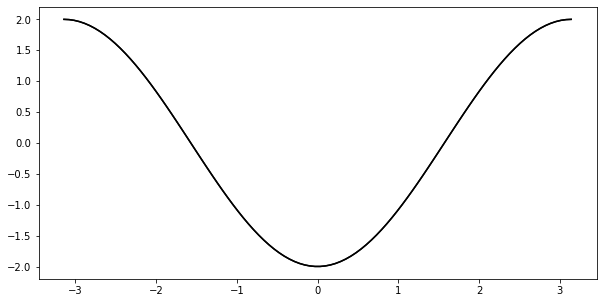

In [6]:
#assume on-site energy Es = 0
# Vsssig=1
# plt.xlabel('Wave vector k [1/a]')
# plt.ylabel('Energy E')
# ham = np.array([
#             [-2*Vsssig*np.cos(k_array)+1,0],
#             [0,0]
#         ])
# eigenvec = np.linalg.eigvalsh(ham)
k_points = 100
kx_list = np.linspace(-np.pi,np.pi,k_points)
energy_list = []
eigvec_list = []
Vsssig=1
for kx in kx_list:
        # Hamilton matrix for k = [kx,ky]
        ham = np.array([
            [-2*Vsssig*np.cos(kx),0],
            [0,-2*Vsssig*np.cos(kx)]
        ])
        # energies are the eigenvalues
        eigval,eigvec=np.linalg.eigh(ham)
        
        energy_list.append(eigval)
        
        #energy_list.append(np.linalg.eigvalsh(ham))
        eigvec_list.append(eigvec.T)


energy_list = np.array(energy_list)
eigvec_list = np.array(eigvec_list)
# energy_list = np.reshape(energy_list, (k_points, k_points, 2))
#plt.plot(kx_list,np.real(eigvec_list))
# print(energy_list)
#print(eigvec_list)
plt.plot(kx_list, energy_list, 'black')
#plt.plot(kx_list, eigvec_list[:,:,1], 'black')


## analytic calculation of density of states

\\( N(E) = \frac{1}{2\pi} \int_k \delta(E - \epsilon(k)) dk. \\) 



<ipython-input-7-04e8b0127805>:5: RuntimeWarning: divide by zero encountered in double_scalars
  DOS = 1/(np.pi*2*Vsssig*np.sqrt(1-(x/2*Vsssig)**2))


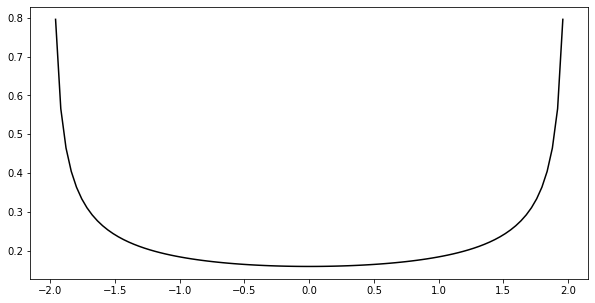

In [7]:
#analytic calculation of density of states
DOS_list = []
dlist = np.linspace(-2*Vsssig,2*Vsssig,100)
for x in dlist:
    DOS = 1/(np.pi*2*Vsssig*np.sqrt(1-(x/2*Vsssig)**2))
    DOS_list.append(DOS)
plt.plot(dlist, DOS_list, 'black')

## Numerial solution of density of states
\\(N(E) = \frac{1}{N}\sum_k \delta(E-\epsilon_k). \\)

Use the Lorentzian approximation to the Delta "function", $\delta(x) \equiv \lim_{\epsilon \rightarrow 0} \frac{\epsilon}{\epsilon^2 + x^2} $.

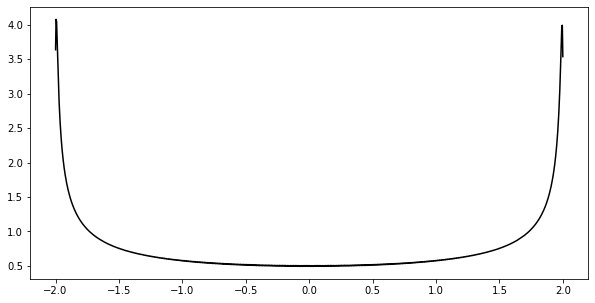

In [8]:
#numerial solution for dos
k_points = 1000
kx_list = np.linspace(-np.pi,np.pi,k_points)
DOS_list = []
dlist = np.linspace(-2*Vsssig,2*Vsssig,1000)
Num_sites = 1000 #how will 
eps = 0.01
def delta(x):
     return eps/(x**2 + eps**2)
def N(E):
     D = (1/Num_sites) * sum([delta(E - 2*Vsssig*np.cos(kx)) for kx in kx_list])
     return D
for d in dlist:
    DOS_list.append(N(d))
plt.plot(dlist, DOS_list, 'black')

In [2]:
a0 = 1.418 # [a0] = A = 10^(-10) m

In [3]:
a1 = a0 * np.array([1.0, 0.0])
a2 = a0 * np.array([0.0, 1.0])

In [4]:
nmax = 4
coordsA = np.array([i * a1 + j * a2 for i in range(-nmax, nmax) for j in range(-nmax, nmax)])

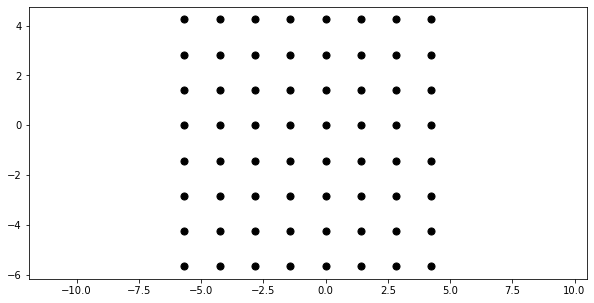

In [5]:
plt.axes().set_aspect('equal','datalim')
x1, y1 = coordsA.T
plt.scatter(x1, y1, 50, 'black')

In [60]:
k_points = 200
kx_list = np.linspace(-np.pi/a0,np.pi/a0,k_points)
ky_list = kx_list
energy_list = []
eigvec_list = []
Vsssig=1
for kx in kx_list:
    for ky in ky_list:
        # Hamilton matrix for k = [kx,ky]
        ham = np.array([
            [0,-4*Vsssig*np.cos(np.dot([kx,ky],[0,a0]))*np.cos(np.dot([kx,ky],[a0,0]))],
            [-4*Vsssig*np.cos(np.dot([kx,ky],[0,a0]))*np.cos(np.dot([kx,ky],[a0,0])),0]
        ])
        eigval,eigvec=np.linalg.eigh(ham)
        # energies are the eigenvalues
        energy_list.append(eigval)
        eigvec_list.append(eigvec)

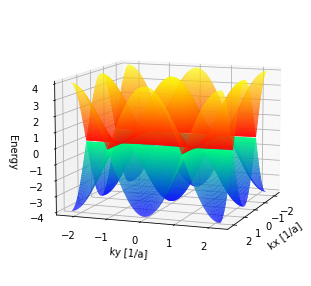

In [61]:
kx_list, ky_list = np.meshgrid(kx_list, ky_list) 
energy_list = np.array(energy_list)
energy_list = np.reshape(energy_list, (k_points, k_points, 2))
plot3D = plt.axes(projection = '3d')

plot3D.set_xlabel('kx [1/a]')
plot3D.set_ylabel('ky [1/a]')
plot3D.set_zlabel('Energy')
plot3D.view_init(10,20)
plot3D.plot_surface(kx_list, ky_list, energy_list[:,:,0], cmap='winter', linewidth = 1, antialiased = True, rstride = 1, cstride = 1)
plot3D.plot_surface(kx_list, ky_list, energy_list[:,:,1], cmap='autumn', linewidth = 1, antialiased = True, rstride = 1, cstride = 1)
#plot3D.plot_surface(kx_list, ky_list, eigvec_list)
plt.savefig('bandstructure_graphene.png', dpi = 300)

In [8]:
# DOS_list = []
# k_points = 200
# kx_list = np.linspace(-np.pi/a0,np.pi/a0,k_points)
# ky_list = kx_list
# dlist = np.linspace(-4*Vsssig,4*Vsssig,100)
# Num_sites = 1
# eps = 0.01
# def delta(x):
#      return eps/(x**2 + eps**2)
# def N(E):
#      D = sum([delta(E - eig) for i in ky_list for eig in energy_list[:,i,1]])
#      dos = (1/Num_sites) * D
#      return dos
# # for x in kx_list:
# #     for y in ky_list:  
# #         DOS_list.append(N(energy_list[x,y,1]))
# for d in dlist:
#     DOS_list.append(N(d))

# DOS_list = np.array(DOS_list)
# plot3D = plt.axes(projection = '3d')
# plot3D.view_init(10,10)
# #plt.plot(dlistx, DOS_list, 'black')
# plot3D.plot_surface(dlistx, dlisty, DOS_list, cmap='winter', linewidth = 1, antialiased = True, rstride = 1, cstride = 1)

In [58]:
a0 = 1.418 # [a0] = A = 10^(-10) m
latlength = np.sqrt(3.) * a0
atoms = 160 # Multiples of 4!
k_points = 201
kx_list = np.linspace(-np.pi/a0,np.pi/a0,k_points)
ky = -np.pi/a0/2
energy_list = []

for kx in kx_list:
        # define the offdiagonal elements
        offdiagonal1 = np.tile(np.array([
            np.cos(ky*a0)*np.cos(kx*a0),np.cos(ky*a0)
        ]),atoms//2)[0:-1]
        offdiagonal2 = np.tile(np.array([
            np.cos(ky*a0)*np.cos(kx*a0),np.cos(kx*a0)
        ]),atoms//2)[0:-1]
        # Hamilton matrix
        ham = np.diag(offdiagonal1, k=1) + np.diag(offdiagonal2, k=-1)
        # energies are the eigenvalues
        energy_list.append(np.linalg.eigvalsh(ham))
#         offdiagonal1a = np.tile(np.array([np.exp(1j*a0*(np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_r
#         offdiagonal1b = np.tile(np.array([np.exp(1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_l
#         offdiagonal1c = np.tile(np.array([0,np.exp(1j*a0*ky)]),atoms//2)[0:-1] 
#         offdiagonal2a = np.tile(np.array([np.exp(-1j*a0*(np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_r
#         offdiagonal2b = np.tile(np.array([np.exp(-1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_l
#         offdiagonal2c = np.tile(np.array([0,np.exp(-1j*a0*ky)]),atoms//2)[0:-1]
#         # Hamilton matrix
#         ham = np.diag(offdiagonal1a, k=1) + np.diag(offdiagonal1b, k=1) + np.diag(offdiagonal1b, k=1) + np.diag(offdiagonal2a, k=-1) + np.diag(offdiagonal2b, k=-1) + np.diag(offdiagonal2c, k=-1)
#         # energies are the eigenvalues
#         energy_list.append(np.linalg.eigvalsh(ham))
energy_list = np.reshape(np.array(energy_list), (k_points, atoms))

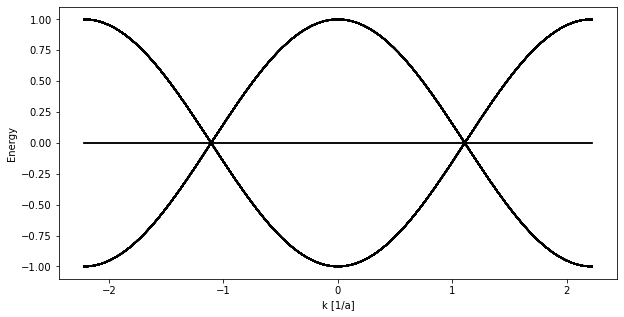

In [59]:
energy_list = np.reshape(np.array(energy_list), (k_points, atoms))
plt.xlabel('k [1/a]')
plt.ylabel('Energy')
for i in range(160):
    #81 82 zero energy
    plt.plot(kx_list,energy_list[:,i], 'black')

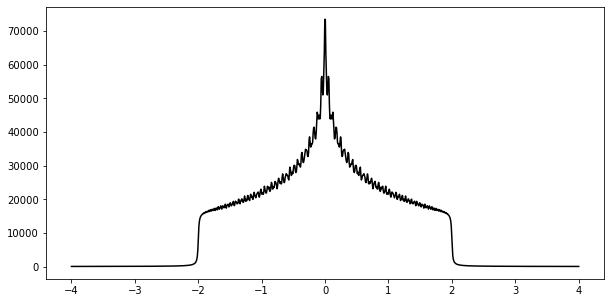

In [50]:
# k_points = 2000
# kx_list = np.linspace(-np.pi,np.pi,k_points)
DOS_list = []
dlist = np.linspace(-4*Vsssig,4*Vsssig,1000)
Num_sites = 1 #how will 
eps = 0.01
def delta(x):
     return eps/(x**2 + eps**2)
def N(E):
     D = sum([delta(E - eig) for i in range(160) for eig in energy_list[:,i]])
     # Minimum D for every E should be pi/4 for the 1D case. Unfortunately,   it's going to 0 mostly. Why? How? 
     dos = (1/Num_sites) * D
     return dos
for d in dlist:
    DOS_list.append(N(d))
plt.plot(dlist, DOS_list, 'black')


In [ ]:
atoms = 160 # Multiples of 4!
bfield = 1

array_mod_r = np.array([np.exp(bfield*1j*np.sqrt(3)/2*a0*i/2*np.sqrt(3)/2*latlength) for i in range(0,atoms)])[0:-1]
array_mod_l = np.array([np.exp(-bfield*1j*np.sqrt(3)/2*a0*i/2*np.sqrt(3)/2*latlength) for i in range(0,atoms)])[0:-1]

In [ ]:
k_points = 201
kx_list = np.linspace(-np.pi/a0,np.pi/a0,k_points)
ky = 0
energy_list = []

for kx in kx_list:
        # define the offdiagonal elements
        offdiagonal1a = np.tile(np.array([np.exp(1j*a0*(np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_r
        offdiagonal1b = np.tile(np.array([np.exp(1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_l
        offdiagonal1c = np.tile(np.array([0,np.exp(1j*a0*ky)]),atoms//2)[0:-1] 
        offdiagonal2a = np.tile(np.array([np.exp(-1j*a0*(np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_r
        offdiagonal2b = np.tile(np.array([np.exp(-1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_l
        offdiagonal2c = np.tile(np.array([0,np.exp(-1j*a0*ky)]),atoms//2)[0:-1]
        # Hamilton matrix
        ham = np.diag(offdiagonal1a, k=1) + np.diag(offdiagonal1b, k=1) + np.diag(offdiagonal1b, k=1) + np.diag(offdiagonal2a, k=-1) + np.diag(offdiagonal2b, k=-1) + np.diag(offdiagonal2c, k=-1)
        # energies are the eigenvalues
        energy_list.append(np.linalg.eigvalsh(ham))

## 2. Two-dimensional band structure of graphene

### 2.1 Plot a graphene lattice

In [12]:
a0 = 1.418 # [a0] = A = 10^(-10) m
latlength = np.sqrt(3.) * a0

In [13]:
# lattice vectors
a1 = latlength * np.array([1.0, 0.0])
a2 = latlength * np.array([-0.5, np.sqrt(3.)/2.])

In [14]:
nmax = 4
coordsA = np.array([i * a1 + j * a2 for i in range(-nmax, nmax) for j in range(-nmax, nmax)])
coordsB = np.array([i * a1 + j * a2 + [0., a0]for i in range(-nmax, nmax) for j in range(-nmax, nmax)])

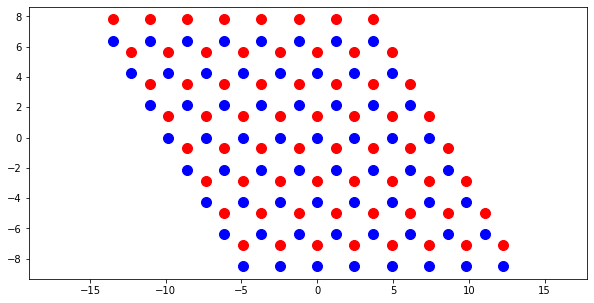

In [15]:
plt.axes().set_aspect('equal','datalim')

x1, y1 = coordsA.T
x2, y2 = coordsB.T
plt.scatter(x1, y1, 100, 'blue')
plt.scatter(x2, y2, 100, 'red')

### 2.2 Tight-binding description of the band structure

In [16]:
k_points = 201
kx_list = np.linspace(-np.pi/a0,np.pi/a0,k_points)
ky_list = kx_list
energy_list = []

for kx in kx_list:
    for ky in ky_list:
        # Hamilton matrix for k = [kx,ky]
        ham = np.array([
            [0,np.exp(1j*np.dot([kx,ky],[0,a0]))+np.exp(1j*np.dot([kx,ky],[a0*np.sqrt(3)/2,-a0/2]))+np.exp(1j*np.dot([kx,ky],[-a0*np.sqrt(3)/2,-a0/2]))],
            [np.exp(1j*np.dot([kx,ky],[0,-a0]))+np.exp(1j*np.dot([kx,ky],[-a0*np.sqrt(3)/2,a0/2]))+np.exp(1j*np.dot([kx,ky],[a0*np.sqrt(3)/2,a0/2])),0]
        ])
        
        # energies are the eigenvalues
        energy_list.append(np.linalg.eigvalsh(ham))

In [17]:
kx_list, ky_list = np.meshgrid(kx_list, ky_list) 
energy_list = np.array(energy_list)

In [18]:
energy_list = np.reshape(energy_list, (k_points, k_points, 2))

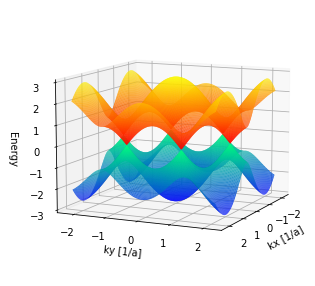

In [19]:
plot3D = plt.axes(projection = '3d')

plot3D.set_xlabel('kx [1/a]')
plot3D.set_ylabel('ky [1/a]')
plot3D.set_zlabel('Energy')
plot3D.view_init(10,25)
plot3D.plot_surface(kx_list, ky_list, energy_list[:,:,0], cmap='winter', linewidth = 1, antialiased = True, rstride = 1, cstride = 1)
plot3D.plot_surface(kx_list, ky_list, energy_list[:,:,1], cmap='autumn', linewidth = 1, antialiased = True, rstride = 1, cstride = 1)

plt.savefig('bandstructure_graphene.png', dpi = 300)

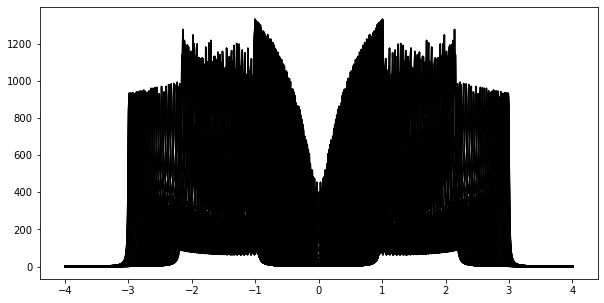

In [20]:
DOS_list = []
dlist = np.linspace(-4*Vsssig,4*Vsssig,1000)
Num_sites = 1
eps = 0.01
def delta(x):
     return eps/(x**2 + eps**2)
def N(E):
     D = sum([delta(E - eig) for i in range(2) for eig in energy_list[:,:,i]])
     dos = (1/Num_sites) * D
     return dos
for d in dlist:
    DOS_list.append(N(d))
plt.plot(dlist, DOS_list, 'black')

### 2.3 Cut through the Dirac points (linear band crossings)

Classical electrons: \\( E(k) = \frac{p^2}{2m} = \frac{\hbar^2}{2m}k^2\\)

Relativistic electrons: \\( E(k) = \pm\sqrt{p^2c^2+m_0^2c^4}\\)

Massless relativistic electrons: \\( E(k) = \pm pc\\)

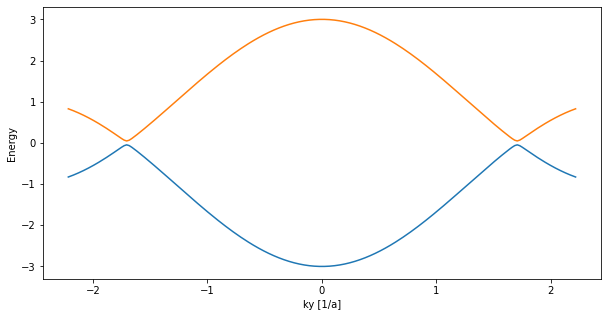

In [21]:
plt.xlabel('ky [1/a]')
plt.ylabel('Energy')
plt.plot(ky_list[:,k_points//2+1],energy_list[:,k_points//2+1,0])
plt.plot(ky_list[:,k_points//2+1],energy_list[:,k_points//2+1,1])

- 2010: Nobel Prize Physics: Andre Geim and Konstantin Novoselov "for groundbreaking experiments regarding the two-dimensional material graphene"

## 3. Nanoribbons of graphene

### 3.1 Construct the lattice

In [22]:
a0 = 1 #1.418 [a0] = A = 10^(-10) m
latlength = np.sqrt(3.) * a0
coordsA = np.array([i * latlength * np.array([0,np.sqrt(3)]) for i in range(-nmax,nmax)])
coordsB = np.array([i * latlength * np.array([0,np.sqrt(3)]) + np.array([0,a0]) for i in range(-nmax,nmax)])
coordsC = np.array([i * latlength * np.array([0,np.sqrt(3)]) + latlength * np.array([1/2, np.sqrt(3)/2]) for i in range(-nmax,nmax)])
coordsD = np.array([i * latlength * np.array([0,np.sqrt(3)]) + np.array([0,a0]) + latlength * np.array([1/2, -np.sqrt(3)/2]) for i in range(-nmax,nmax)])

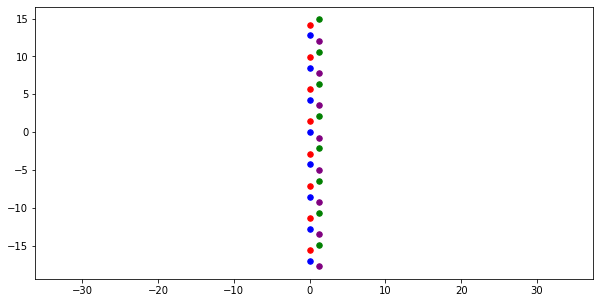

In [23]:
plt.axes().set_aspect('equal','datalim')

x1, y1 = coordsA.T
x2, y2 = coordsB.T
x3, y3 = coordsC.T
x4, y4 = coordsD.T

plt.scatter(x1, y1, 30, 'blue')
plt.scatter(x2, y2, 30, 'red')
plt.scatter(x3, y3, 30, 'green')
plt.scatter(x4, y4, 30, 'purple')

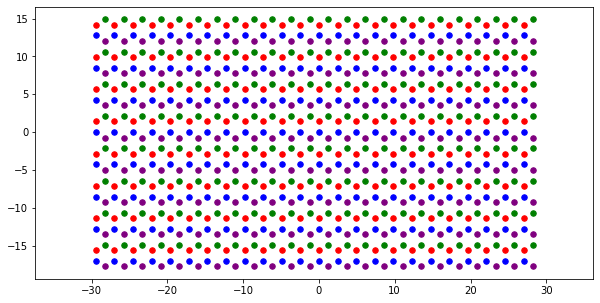

In [24]:
plt.axes().set_aspect('equal','datalim')

x1, y1 = coordsA.T
x2, y2 = coordsB.T
x3, y3 = coordsC.T
x4, y4 = coordsD.T

for i in range(-12,12):
    plt.scatter(x1 + i * latlength, y1, 30, 'blue')
    plt.scatter(x2 + i * latlength, y2, 30, 'red')
    plt.scatter(x3 + i * latlength, y3, 30, 'green')
    plt.scatter(x4 + i * latlength, y4, 30, 'purple')

### 3.2 Define and diagonalize the Hamilton matrix

\\( H = \begin{pmatrix} 
0 & pb & 0 & 0 & \dots \\ 
bp & 0 & br & 0 & \dots \\ 
0 & rb & 0 & rg & \dots \\ 
0 & 0 & gr & 0 & \dots \\
\vdots & \vdots & \vdots & \vdots & \ddots
\end{pmatrix} \\)

\\( 
pb = rg = \exp\left[ia_0\left(\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right] + \exp\left[ia_0\left(-\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right]\\
bp = gr = \exp\left[-ia_0\left(\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right] + \exp\left[-ia_0\left(-\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right]\\
br = gp = \exp\left(ia_0k_y\right)\\
rb = pg = \exp\left(-ia_0k_y\right)
\\)

In [25]:
np.diag([1,2,3], k=1) + np.diag([1,2,3], k=-1)

array([[0, 1, 0, 0],
       [1, 0, 2, 0],
       [0, 2, 0, 3],
       [0, 0, 3, 0]])

In [53]:
atoms = 160 # Multiples of 4!

k_points = 500
kx_list = np.linspace(-np.pi/a0,np.pi/a0,k_points)
ky = 1 #ky has no affect on the energy
energy_list = []

for kx in kx_list:
        # define the offdiagonal elements
        offdiagonal1 = np.tile(np.array([
            np.exp(1j*a0*(np.sqrt(3)/2*kx+1/2*ky)) + np.exp(1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),
            np.exp(1j*a0*ky)
        ]),atoms//2)[0:-1] #vary the coefficients of the exponential terms
        offdiagonal2 = np.tile(np.array([
            np.exp(-1j*a0*(np.sqrt(3)/2*kx+1/2*ky)) + np.exp(-1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),
            np.exp(-1j*a0*ky)
        ]),atoms//2)[0:-1]
        # Hamilton matrix
        ham = np.diag(offdiagonal1, k=1) + np.diag(offdiagonal2, k=-1)
        # energies are the eigenvalues
        energy_list.append(np.linalg.eigvalsh(ham))


In [54]:
energy_list = np.reshape(np.array(energy_list), (k_points, atoms))
# print(energy_list)

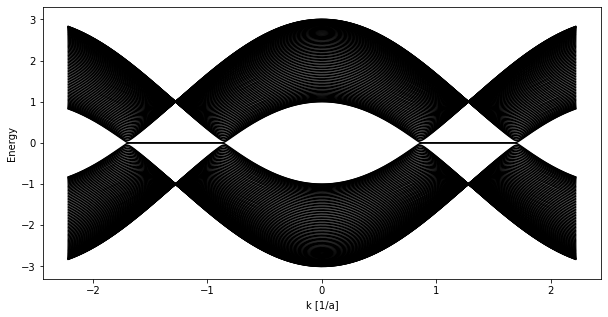

In [55]:
plt.xlabel('k [1/a]')
plt.ylabel('Energy')
for i in range(160):
    #81 82 zero energy
    plt.plot(kx_list,energy_list[:,i], 'black')

### Density of States for Single layer graphene

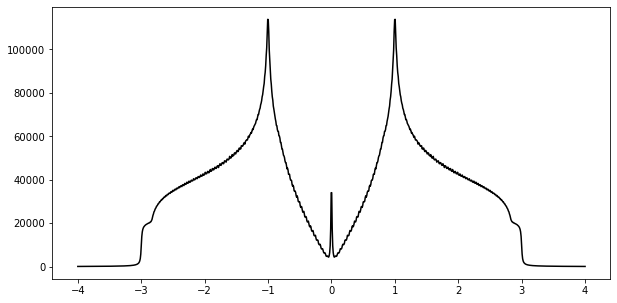

In [46]:
# k_points = 2000
# kx_list = np.linspace(-np.pi,np.pi,k_points)
DOS_list = []
dlist = np.linspace(-4*Vsssig,4*Vsssig,1000)
Num_sites = 1 #how will 
eps = 0.01
def delta(x):
     return eps/(x**2 + eps**2)
def N(E):
     D = sum([delta(E - eig) for i in range(160) for eig in energy_list[:,i]])
     # Minimum D for every E should be pi/4 for the 1D case. Unfortunately,   it's going to 0 mostly. Why? How? 
     dos = (1/Num_sites) * D
     return dos
for d in dlist:
    DOS_list.append(N(d))
plt.plot(dlist, DOS_list, 'black')


### 3.3 Landau quantization & Quantum Hall effect (Metallic behavior due to edge channels)

- Modify hoppings 

\\( \vec{A}(\vec{r}) = -B y \vec{e}_x \\)

\\( \vec{B}(\vec{r}) = \nabla \times \vec{A}(\vec{r}) \\)

additional factor: \\( \exp\left(i\int_\mathrm{hopping}\vec{A}\cdot\mathrm{d}\vec{r}\right) = \exp\left(-i(x_2-x_1) B \frac{y_1+y_2}{2}\right)\\)

In [31]:
atoms = 160 # Multiples of 4!
bfield = 10

array_mod_r = np.array([np.exp(bfield*1j*np.sqrt(3)/2*a0*i/2*np.sqrt(3)/2*latlength) for i in range(0,atoms)])[0:-1]
array_mod_l = np.array([np.exp(-bfield*1j*np.sqrt(3)/2*a0*i/2*np.sqrt(3)/2*latlength) for i in range(0,atoms)])[0:-1]

In [22]:
k_points = 201
kx_list = np.linspace(-np.pi/a0,np.pi/a0,k_points)
ky = 0
energy_list = []

for kx in kx_list:
        # define the offdiagonal elements
        offdiagonal1a = np.tile(np.array([np.exp(1j*a0*(np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_r
        offdiagonal1b = np.tile(np.array([np.exp(1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_l
        offdiagonal1c = np.tile(np.array([0,np.exp(1j*a0*ky)]),atoms//2)[0:-1] 
        offdiagonal2a = np.tile(np.array([np.exp(-1j*a0*(np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_r
        offdiagonal2b = np.tile(np.array([np.exp(-1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] * array_mod_l
        offdiagonal2c = np.tile(np.array([0,np.exp(-1j*a0*ky)]),atoms//2)[0:-1]
        # Hamilton matrix
        ham = np.diag(offdiagonal1a, k=1) + np.diag(offdiagonal1b, k=1) + np.diag(offdiagonal1b, k=1) + np.diag(offdiagonal2a, k=-1) + np.diag(offdiagonal2b, k=-1) + np.diag(offdiagonal2c, k=-1)
        # energies are the eigenvalues
        energy_list.append(np.linalg.eigvalsh(ham))

In [23]:
energy_list = np.reshape(np.array(energy_list), (k_points, atoms))

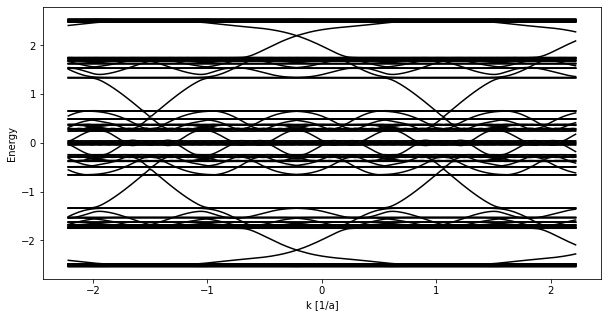

In [24]:
plt.xlabel('k [1/a]')
plt.ylabel('Energy')
for i in range(atoms):
    plt.plot(kx_list,energy_list[:,i], 'black')

- 2016: Nobel Prize Physics: David Thouless, Duncan Haldane and Michael Kosterlitz “for theoretical discoveries of topological phase transitions and topological phases of matter”

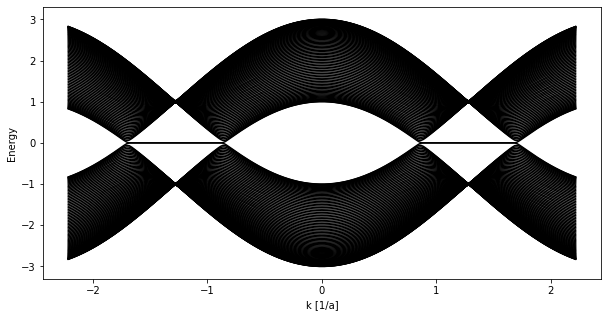

In [41]:
k_points = 201
kx_list = np.linspace(-np.pi/a0,np.pi/a0,k_points)
ky = 0
energy_list = []

for kx in kx_list:
        # define the offdiagonal elements
        offdiagonal1a = np.tile(np.array([np.exp(1j*a0*(np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] 
        offdiagonal1b = np.tile(np.array([np.exp(1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] 
        offdiagonal1c = np.tile(np.array([0,np.exp(1j*a0*ky)]),atoms//2)[0:-1]
        offdiagonal2a = np.tile(np.array([np.exp(-1j*a0*(np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] 
        offdiagonal2b = np.tile(np.array([np.exp(-1j*a0*(-np.sqrt(3)/2*kx+1/2*ky)),0]),atoms//2)[0:-1] 
        offdiagonal2c = np.tile(np.array([0,np.exp(-1j*a0*ky)]),atoms//2)[0:-1]
        # Hamilton matrix
        ham = np.diag(offdiagonal1a, k=1) + np.diag(offdiagonal1b, k=1) + np.diag(offdiagonal1b, k=1) + np.diag(offdiagonal2a, k=-1) + np.diag(offdiagonal2b, k=-1) + np.diag(offdiagonal2c, k=-1)
        # energies are the eigenvalues
        energy_list.append(np.linalg.eigvalsh(ham))
energy_list = np.reshape(np.array(energy_list), (k_points, atoms))
plt.xlabel('k [1/a]')
plt.ylabel('Energy')
for i in range(atoms):
    plt.plot(kx_list,energy_list[:,i], 'black')

## 4. Twisted bilayers & Moiré patterns

In [25]:
z0 = -3.349

twist = 12
nmax = 4*twist

alpha =  2. * np.arctan(np.sqrt(3.)/2./(3.*twist+1.5))

print ("Twisting angle [°]:   ",alpha*180/np.pi)
print ("Number of atoms (analytical, per sublattice):   ", ((3.*twist+1.5)**2+(np.sqrt(3.)/2.)**2)*np.sin(np.pi/3.)/(3*np.sin(np.pi/3)))

Twisting angle [°]:    2.645908381192724
Number of atoms (analytical, per sublattice):    468.99999999999994


In [26]:
# lattice vectors sublattice 1
a1 = latlength * np.array([1., 0., 0.])
a2 = latlength * np.array([-0.5, np.sqrt(3.)/2., 0.])

# lattice vectors sublattice 2
b1 = np.array([ np.cos(alpha) * a1[0] - np.sin(alpha) * a1[1], np.sin(alpha) * a1[0] + np.cos(alpha) * a1[1], 0. ])
b2 = np.array([ np.cos(alpha) * a2[0] - np.sin(alpha) * a2[1], np.sin(alpha) * a2[0] + np.cos(alpha) * a2[1], 0. ])

# superlattice vectors (Moire pattern periodicity)
s1 = latlength/np.sqrt(3.) * np.array([-np.sqrt(3.)/2., 3.0*twist+1.5,0.])
s2 = np.array([np.cos(-2.*np.pi/3.)*s1[0]-np.sin(-2.*np.pi/3.)*s1[1], np.sin(-2.*np.pi/3.)*s1[0]+np.cos(-2.*np.pi/3.)*s1[1], 0.])

# reciprocal lattice vectors
r1 = 2 * np.pi * np.array([s2[1], -s2[0], 0.]) / abs(s1[0] * s2[1] - s1[1] * s2[0])
r2 = 2 * np.pi * np.array([-s1[1], s1[0], 0.]) / abs(s1[0] * s2[1] - s1[1] * s2[0])

In [27]:
#Coordinates sublattice 1 & 2 for layers 1 & 2
coords1a = np.array([i * a1 + j * a2 for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])
coords2a = np.array([i * b1 + j * b2 + [0.,0.,z0] for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])

coords1b = np.array([i * a1 + j * a2 + [0.,a0,0.] for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])
coords2b = np.array([i * b1 + j * b2 + [-np.sin(alpha)*a0,np.cos(alpha)*a0,z0] for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])

coords1 = np.concatenate((coords1a, coords1b), axis=0)
coords2 = np.concatenate((coords2a, coords2b), axis=0)

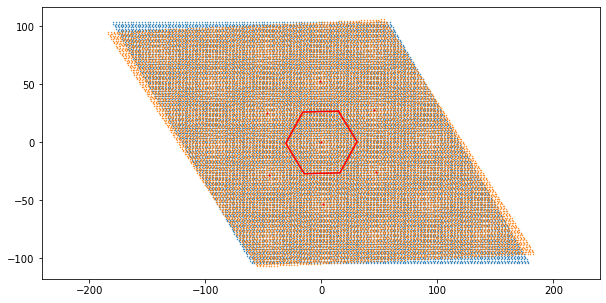

In [28]:
plt.axes().set_aspect('equal', 'datalim')
x1, y1, z1 = coords1.T
x2, y2, z2 = coords2.T
plt.scatter(x1, y1, s=30/twist**2)
plt.scatter(x2, y2, s=30/twist**2)

plt.scatter([0, s1[0], s2[0], -s1[0], -s2[0], s1[0]+s2[0], -s1[0]-s2[0]],
            [0, s1[1], s2[1], -s1[1], -s2[1], s1[1]+s2[1], -s1[1]-s2[1]],s=200/twist**2, 
            c='r')

# define corner points
corner1 = np.array(( 2*s1+1*s2)/3)
corner2 = np.array(( 1*s1-1*s2)/3)
corner3 = np.array((-1*s1-2*s2)/3)
corner4 = np.array((-2*s1-1*s2)/3)
corner5 = np.array((-1*s1+1*s2)/3)
corner6 = np.array(( 1*s1+2*s2)/3)

# plot the unit cell boundaries
plt.plot(
    [corner1[0], corner2[0], corner3[0], corner4[0], corner5[0], corner6[0], corner1[0]],
    [corner1[1], corner2[1], corner3[1], corner4[1], corner5[1], corner6[1], corner1[1]],
    c='r')

plt.savefig('lattice.png', dpi=300)